In [0]:
import pandas as pd
import numpy as np
import matplotlib.pyplot as plt

In [0]:
train_df = pd.read_csv('AAPL_train.csv')
test_df = pd.read_csv('AAPL_test.csv')

In [19]:
train_df['Average'] = (train_df['High']+train_df['Low'])/2
test_df['Average'] = (test_df['High']+test_df['Low'])/2
train_df.head()

,Date,Open,High,Low,Close,Adj Close,Volume,Average
0,2013-06-20,59.900002,60.854286,59.310001,59.548573,53.286648,89327700,60.082144
1,2013-06-21,59.784286,60.000000,58.299999,59.071430,52.859688,120279600,59.149999
2,2013-06-24,58.200001,58.380001,56.864285,57.505714,51.458607,120186500,57.622143
3,2013-06-25,57.957142,58.255714,56.975716,57.518570,51.470112,78540700,57.615715
4,2013-06-26,57.700001,57.827145,56.522858,56.867142,50.887192,91931000,57.175001


In [0]:
input_features = train_df.iloc[:, [6,7]].values
input_data = input_features

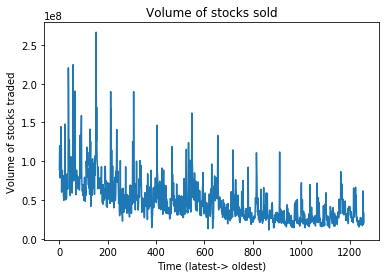

In [21]:
plt.plot(input_features[:,0])
plt.title("Volume of stocks sold")
plt.xlabel("Time (latest-> oldest)")
plt.ylabel("Volume of stocks traded")
plt.show()

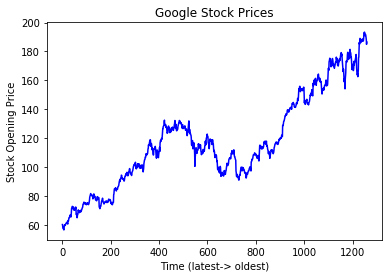

In [22]:
plt.plot(input_features[:,1], color='blue')
plt.title("Google Stock Prices")
plt.xlabel("Time (latest-> oldest)")
plt.ylabel("Stock Opening Price")
plt.show()

In [0]:
from sklearn.preprocessing import MinMaxScaler
sc= MinMaxScaler(feature_range=(0,1))
input_data[:,0:2] = sc.fit_transform(input_features[:,:])

In [0]:
lookback= 60

test_size=int(.3 * len(train_df))
X=[]
y=[]
for i in range(len(train_df)-lookback-1):
    t=[]
    for j in range(0,lookback):
        
        t.append(input_data[[(i+j)], :])
    X.append(t)
    y.append(input_data[i+ lookback,1])

In [26]:
X, y= np.array(X), np.array(y)
X_test = X[:test_size+lookback]
X = X.reshape(X.shape[0],lookback, 2)
X_test = X_test.reshape(X_test.shape[0],lookback, 2)
print(X.shape)
print(X_test.shape)

(1199, 60, 2)
(438, 60, 2)


In [27]:
from keras import Sequential
from keras.layers import Dense, LSTM, Dropout

Using TensorFlow backend.


In [28]:
model = Sequential()

model.add(LSTM(units=50, return_sequences=True, input_shape=(X.shape[1], 2)))
model.add(Dropout(0.2))

model.add(LSTM(units=50, return_sequences=True))  
model.add(Dropout(0.2))

model.add(LSTM(units=50, return_sequences=True))  
model.add(Dropout(0.2))

model.add(LSTM(units=50))  
model.add(Dropout(0.2))

model.add(Dense(units = 1))  

model.compile(optimizer = 'adam', loss = 'mean_squared_error')  

W0621 17:05:43.892690 140657094203264 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:74: The name tf.get_default_graph is deprecated. Please use tf.compat.v1.get_default_graph instead.

W0621 17:05:43.943948 140657094203264 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:517: The name tf.placeholder is deprecated. Please use tf.compat.v1.placeholder instead.

W0621 17:05:43.952315 140657094203264 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:4138: The name tf.random_uniform is deprecated. Please use tf.random.uniform instead.

W0621 17:05:44.208415 140657094203264 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:133: The name tf.placeholder_with_default is deprecated. Please use tf.compat.v1.placeholder_with_default instead.

W0621 17:05:44.219920 

In [29]:
model.fit(X, y, epochs=100, batch_size=32)

W0621 17:06:00.208052 140657094203264 deprecation.py:323] From /usr/local/lib/python3.6/dist-packages/tensorflow/python/ops/math_grad.py:1250: add_dispatch_support.<locals>.wrapper (from tensorflow.python.ops.array_ops) is deprecated and will be removed in a future version.
Instructions for updating:
Use tf.where in 2.0, which has the same broadcast rule as np.where
W0621 17:06:02.976966 140657094203264 deprecation_wrapper.py:119] From /usr/local/lib/python3.6/dist-packages/keras/backend/tensorflow_backend.py:986: The name tf.assign_add is deprecated. Please use tf.compat.v1.assign_add instead.



Epoch 1/100
1199/1199 [==============================] - 9s 8ms/step - loss: 0.0413
Epoch 2/100
1199/1199 [==============================] - 6s 5ms/step - loss: 0.0051
Epoch 3/100
1199/1199 [==============================] - 6s 5ms/step - loss: 0.0049
Epoch 4/100
1199/1199 [==============================] - 6s 5ms/step - loss: 0.0038
Epoch 5/100
1199/1199 [==============================] - 6s 5ms/step - loss: 0.0044
Epoch 6/100
1199/1199 [==============================] - 6s 5ms/step - loss: 0.0041
Epoch 7/100
1199/1199 [==============================] - 6s 5ms/step - loss: 0.0037
Epoch 8/100
1199/1199 [==============================] - 6s 5ms/step - loss: 0.0040
Epoch 9/100
1199/1199 [==============================] - 6s 5ms/step - loss: 0.0038
Epoch 10/100
1199/1199 [==============================] - 6s 5ms/step - loss: 0.0037
Epoch 11/100
1199/1199 [==============================] - 6s 5ms/step - loss: 0.0034
Epoch 12/100
1199/1199 [==============================] - 6s 5ms/step - lo

In [0]:
predicted_value= model.predict(X_test)

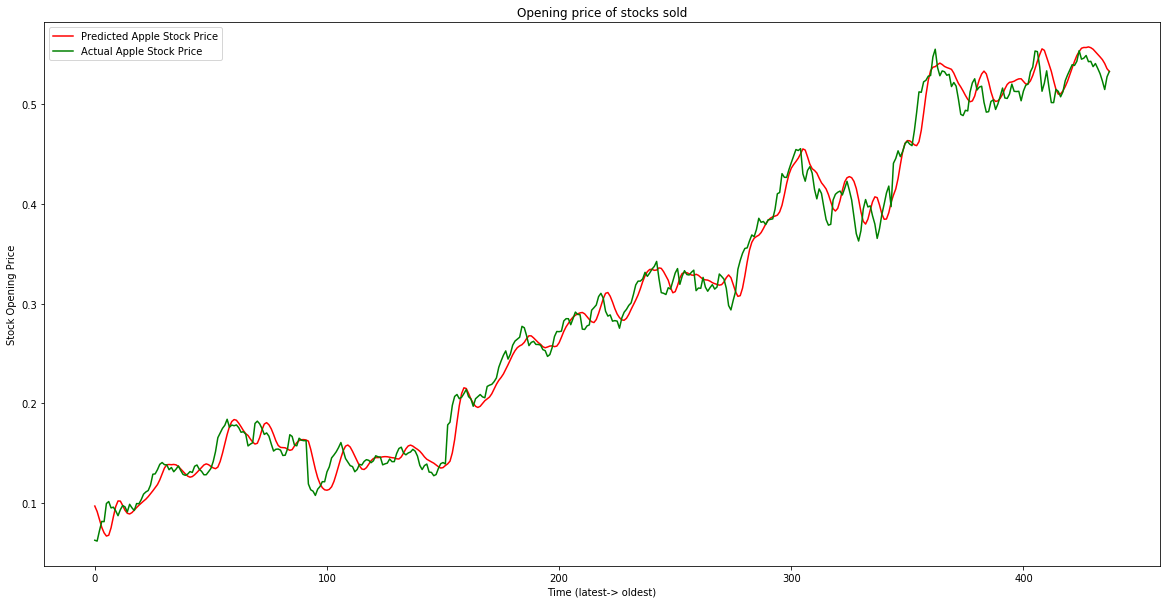

In [36]:
plt.figure(figsize=(20,10))

plt.plot(predicted_value, color= 'red', label='Predicted Apple Stock Price')
plt.plot(input_data[lookback:test_size+(2*lookback),1], color='green', label='Actual Apple Stock Price')
plt.title("Opening price of stocks sold")
plt.xlabel("Time (latest-> oldest)")
plt.ylabel("Stock Opening Price")
plt.legend()  
plt.show()